In [1]:
import numpy as np
import ANNarchy as ann
from matplotlib.pyplot import plot
ann.setup(dt=0.05)

ANNarchy 4.7 (4.7.1) on linux (posix).


In [2]:
# p = ann.PoissonPopulation(600, rates=13.0)
# pr = ann.PoissonPopulation(600, rates=13.0, refractory=1.0)
# ta = ann.TimedArray(np.array([[100.0], [200.0]]), schedule=[100.0, 500.0])
c = ann.HomogeneousCorrelatedSpikeTrains(600, rates=[0.0], 
                                         schedule=[0.0], corr=0.3, tau=10.0)
# cr = ann.HomogeneousCorrelatedSpikeTrains(600, rates=13.0, corr=0.1, tau=10.0, refractory=1.0)
# pr = ann.Projection(pre=ta, post=c, target="exc")
# pr.connect_all_to_all(1.0)

In [3]:
# mp = ann.Monitor(p, ["spike"])
# mpr = ann.Monitor(pr, ["spike"])
mc = ann.Monitor(c, ["spike"])
# mcr = ann.Monitor(cr, ["spike"])

In [4]:
ann.compile()

In [5]:
import numpy as np

dt = 0.1
step = 1
for ii in range(10000):
    ann.simulate(dt)
    if np.mod(ii, step) == 0:
        t = int(ann.get_time()/dt)
        schedule = (np.arange(t+1, t+step+1)*dt).tolist()
        rates = (13.0 + np.random.normal(size=(step,))).tolist()
        c.set({"schedule": schedule, "rates": rates})
#         c.schedule = schedule
#         c.rates =rates
    

In [6]:
# sm = mp.get('spike')
# smr = mpr.get('spike')
smc = mc.get('spike')
# smcr = mcr.get('spike')

In [7]:
# spt, spr = mp.raster_plot(sm)
# plot(spt, spr, '.')
# prate = len(spt) / 600
# print("PP rate without ref = %g" % prate)

In [8]:
# sprt, sprr = mpr.raster_plot(smr)
# plot(sprt, sprr, '.')
# prrate = len(sprt) / 600
# print("PP rate with ref = %g" % prrate)

HCST rate without ref = 10.805


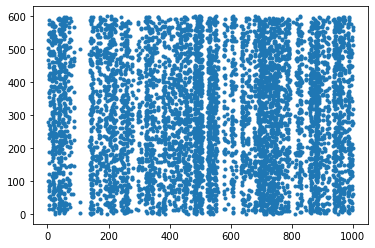

In [9]:
sct, scr = mc.raster_plot(smc)
plot(sct, scr, '.')
crate = len(sct) / 600
print("HCST rate without ref = %g" % crate)

In [10]:
# scrt, scrr = mcr.raster_plot(smcr)
# plot(scrt, scrr, '.')
# crrate = len(scrt) / 600
# print("HCST rate with ref = %g" % crrate)

In [11]:
c.rates

array([13.17967941])

In [12]:
c.schedule

array([1000.1])

In [13]:
np.int()

/tmp/ipykernel_21795/3424484949.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.int()


0

In [14]:
rates

[13.179679414487072]

In [15]:
ann.get_time()

1000.0